In [65]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

'2.2.4'

In [106]:
#사이즈맞추기
width = 28
height = 28

In [107]:
#학습,출력,테스트 데이터 빈리스트만들기
train_image = []
output_image = []
test_image = []

In [108]:
#불러올 이미지 디렉토리 지정
image_dir = '/Users/joannakang/Documents/Python_study/train_output'
test_dir = '/Users/joannakang/Documents/Python_study/test_input'

In [109]:
#디렉토리의 파일명을 리스트화
image_list = os.listdir(image_dir)
test_list = os.listdir(test_dir)

In [110]:
#제대로 불러온건지 확인하기
print (image_list)
print (test_list)

['63.jpg', '77.jpg', '76.jpg', '62.jpg', '74.jpg', '60.jpg', '48.jpg', '49.jpg', '61.jpg', '75.jpg', '59.jpg', '71.jpg', '65.jpg', '64.jpg', '70.jpg', '58.jpg', '8.jpg', '66.jpg', '72.jpg', '73.jpg', '67.jpg', '9.jpg', '14.jpg', '28.jpg', '29.jpg', '15.jpg', '17.jpg', '16.jpg', '12.jpg', '13.jpg', '39.jpg', '11.jpg', '10.jpg', '38.jpg', '21.jpg', '35.jpg', '34.jpg', '20.jpg', '36.jpg', '22.jpg', '23.jpg', '37.jpg', '33.jpg', '27.jpg', '26.jpg', '32.jpg', '18.jpg', '24.jpg', '30.jpg', '31.jpg', '25.jpg', '19.jpg', '42.jpg', '4.jpg', '56.jpg', '5.jpg', '57.jpg', '43.jpg', '55.jpg', '7.jpg', '41.jpg', '69.jpg', '68.jpg', '40.jpg', '54.jpg', '6.jpg', '78.jpg', '2.jpg', '50.jpg', '44.jpg', '45.jpg', '3.jpg', '51.jpg', '47.jpg', '53.jpg', '1.jpg', '52.jpg', '46.jpg']
['hello8.png', 'hello9.png', 'hello10.png', 'hello2.png', 'hello3.png', 'hello1.png', 'hello4.png', 'hello5.png', 'hello7.png', 'hello6.png']


In [111]:
#아웃풋 데이터 경로 지정해서 불러오기 : 컬러로
for i in image_list:
    img = os.path.join(image_dir, i)
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
    img = img.reshape((28, 28, 3))
    img = np.array(img)
    output_image.append(img)

In [112]:
#인풋 데이터 경로 지정해서 불러오기 : 흑백으로
for i in image_list:
    img = os.path.join(image_dir, i)
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
    img = img.reshape((28, 28, 1))
    img = np.array(img)
    train_image.append(img)

In [113]:
#테스트 데이터 경로 지정해서 불러오기 : 흑백으로
for i in test_list:
    img = os.path.join(test_dir, i)
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
    img = img.reshape((28, 28, 1))
    img = np.array(img)
    test_image.append(img)

In [114]:
#불러온 데이터를 행렬로 변환
train_image = np.array(train_image)
output_image = np.array(output_image)
test_image = np.array(test_image)

In [115]:
#데이터 형태 확인하기 1=흑백, 3=컬러
print(train_image.shape)
print(output_image.shape)
print(test_image.shape)

(78, 28, 28, 1)
(78, 28, 28, 3)
(10, 28, 28, 1)


In [123]:
#흑백일때 reshape(28,28)
#컬러일때 reshape(28,28,3)
a = test_image[1].reshape(28,28)

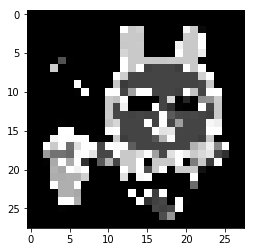

In [124]:
#이미지 출력해보기
plt.imshow(a, cmap = 'Greys')

In [82]:
train_image = train_image.reshape((len(train_image), width, height, 1))
output_image = output_image.reshape(len(output_image), 3 * 784)

In [83]:
#학습시킬 데이터 형태 확인해보기
print(train_image.shape)
print(output_image.shape)

(78, 28, 28, 1)
(78, 2352)


In [85]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (width, height, train_image.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense((3 * 784), activation = 'sigmoid'))

In [86]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [88]:
model.fit(x = train_image, y = output_image, batch_size = 5, epochs = 10)

Epoch 1/10
78/78 [==============================] - 0s 6ms/step - loss: -2557.5116 - acc: 0.0012
Epoch 2/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9424 - acc: 9.8116e-04
Epoch 3/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9540 - acc: 9.8116e-04
Epoch 4/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9540 - acc: 9.8116e-04
Epoch 5/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9541 - acc: 9.8116e-04
Epoch 6/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.0282 - acc: 9.8116e-04
Epoch 7/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9540 - acc: 9.8116e-04
Epoch 8/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9540 - acc: 9.8116e-04
Epoch 9/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9539 - acc: 9.8116e-04
Epoch 10/10
78/78 [==============================] - 0s 1ms/step - loss: -3224.9540 - acc: 9.81

In [120]:
result = model.predict(x = test_image)

In [121]:
print(result)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


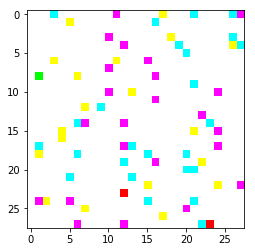

In [122]:
plt.imshow(result[2].reshape(width, height, 3))